In [8]:
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
import time 
import os 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### LM-37 bacteria vis

In [2]:
df_37 = pd.read_csv(
    "bacteria-37.csv",
    header=1,
    usecols= [
        "Position X",
        "Position Y",
        "Position Z",
        "Time",
        "TrackID",
        "ID"
    ]
)

In [3]:
display(df_37.head())
df_37.info()

,Position X,Position Y,Position Z,Time,TrackID,ID
0,248.6320,10.7085,0.1815,1,1000000008,8
1,346.6570,10.7085,0.1815,1,1000000014,14
2,52.1679,11.1991,0.1815,1,1000000015,15
3,32.9705,11.6746,0.1815,1,1000000018,18
4,272.7170,11.8309,0.1815,1,1000000020,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17822 entries, 0 to 17821
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position X  17822 non-null  float64
 1   Position Y  17822 non-null  float64
 2   Position Z  17822 non-null  float64
 3   Time        17822 non-null  int64  
 4   TrackID     17822 non-null  int64  
 5   ID          17822 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 835.5 KB


In [ ]:
fig, ax = plt.subplots()

t_1 = df_37[df_37["Time"] == 1].sort_values(by="TrackID")
scat = ax.scatter(t_1["Position X"], t_1["Position Y"])

def animate_scatter(i):
    scat.set_offsets(df_37[df_37["Time"] == i].sort_values(by="TrackID")[["Position X", "Position Y"]])
    return scat,

ani = animation.FuncAnimation(fig, animate_scatter, repeat=True, interval=50, frames=range(1,61))
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

In [ ]:
fig, ax = plt.subplots()

for i in range(1, 61):
    #cur = track[track["Time"] == i]
    cur = df_37[df_37["Time"] == i]
    ax.scatter(cur["Position X"], cur["Position Y"])
    display(fig)
    clear_output(wait=True)
    ax.cla()

### LM-RT bacteria

In [18]:
df_rt = pd.read_csv(
    "bacteria-RT.csv",
    header=1,
    usecols= [
        "Position X",
        "Position Y",
        "Position Z",
        "Time",
        "TrackID",
        "ID"
    ]
)

In [19]:
display(df_rt.head())
df_rt.info()

,Position X,Position Y,Position Z,Time,TrackID,ID
0,295.338,258.637,0.1815,1,1000000007,7
1,422.484,258.637,0.1815,1,1000000014,14
2,468.483,258.637,0.1815,1,1000000016,16
3,362.448,259.978,0.1815,1,1000000025,25
4,470.481,261.132,0.1815,1,1000000029,29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29493 entries, 0 to 29492
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position X  29493 non-null  float64
 1   Position Y  29493 non-null  float64
 2   Position Z  29493 non-null  float64
 3   Time        29493 non-null  int64  
 4   TrackID     29493 non-null  int64  
 5   ID          29493 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.4 MB


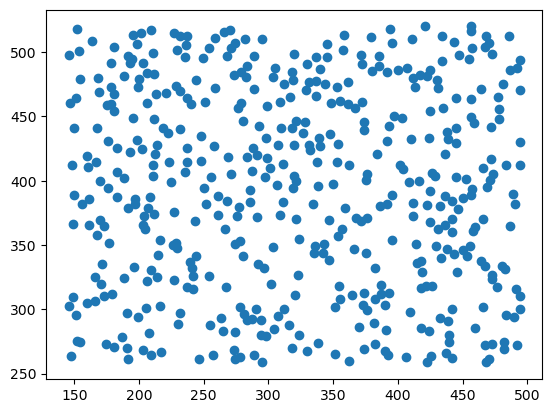

In [21]:
fig, ax = plt.subplots()

t_1 = df_rt[df_rt["Time"] == 1].sort_values(by="TrackID")
scat = ax.scatter(t_1["Position X"], t_1["Position Y"])

def animate_scatter(i):
    scat.set_offsets(df_rt[df_rt["Time"] == i].sort_values(by="TrackID")[["Position X", "Position Y"]])
    return scat,

ani = animation.FuncAnimation(fig, animate_scatter, repeat=True, interval=50, frames=range(1,61))
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter_rt.gif', writer=writer)

In [ ]:
fig, ax = plt.subplots()
ax.set(xlim=(120, 530))

for i in range(1, 61):
    #cur = track[track["Time"] == i]
    cur = df_rt[df_rt["Time"] == i]
    ax.set(xlim=(120, 530))
    ax.scatter(cur["Position X"], cur["Position Y"])
    display(fig)
    clear_output(wait=True)
    ax.cla()

### LM-RT filtered

In [10]:
data_folder = "./bacteria_filtered/csv"
track_paths = os.listdir(data_folder)

frames = []
for path in track_paths:
    df = pd.read_csv(f"{data_folder}/{path}", index_col=0)
    df["trackID"] = path.split(" ")[-2]
    #print(df.head())
    frames.append(df)

df_filtered = pd.concat(frames, ignore_index=True)
display(df_filtered.head())

,t,x,y,trackID
0,0.25,274.245,261.445,1000000032
1,0.50,274.232,261.450,1000000032
2,0.75,274.237,261.449,1000000032
3,1.00,274.224,261.416,1000000032
4,1.25,274.225,261.369,1000000032


In [ ]:
fig, ax = plt.subplots()

t_1 = df_filtered[df_filtered["t"] == 0.25].sort_values(by="trackID")
scat = ax.scatter(t_1["x"], t_1["y"])

def animate_scatter(i):
    scat.set_offsets(df_filtered[df_filtered["t"] == i].sort_values(by="trackID")[["x", "y"]])
    return scat,

ani = animation.FuncAnimation(fig, animate_scatter, repeat=True, interval=50, frames=range(1,61))
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter_filtered.gif', writer=writer)

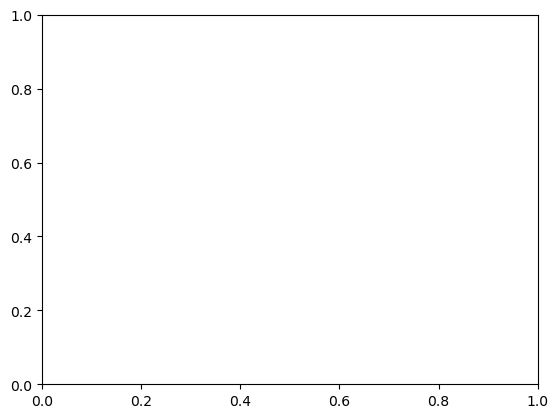

In [15]:
fig, ax = plt.subplots()

for timestamp in pd.unique(df_filtered["t"]):
    #cur = track[track["Time"] == i]
    cur = df_filtered[df_filtered["t"] == timestamp]
    ax.scatter(cur["x"], cur["y"])
    display(fig)
    clear_output(wait=True)
    ax.cla()